In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
url = 'https://raw.githubusercontent.com/AllThingsDataWithAngelina/DataSource/main/sales_data_sample.csv'
df = pd.read_csv(url, encoding='ISO-8859-1')

print(df.head())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [ ]:
print(df.isnull().sum())

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
df = df[['ORDERDATE', 'SALES']]


In [ ]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


In [ ]:
df['Month'] = df['ORDERDATE'].dt.month
df['Year'] = df['ORDERDATE'].dt.year


In [ ]:
monthly_sales = df.groupby(['Year', 'Month'])['SALES'].sum().reset_index()


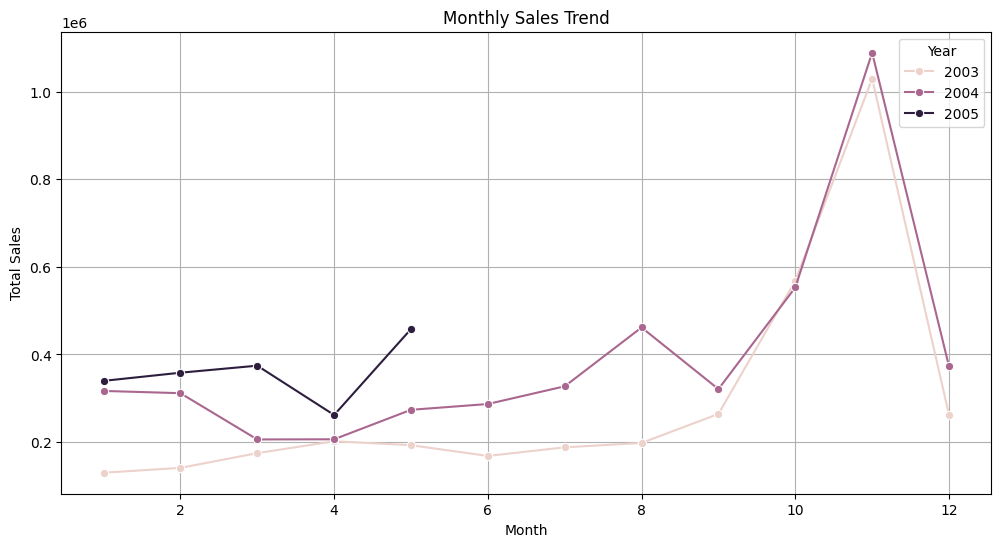

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='SALES', hue='Year', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.grid(True)
plt.show()


In [ ]:
monthly_sales['Month_Year'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)
monthly_sales['Month_Year_Num'] = np.arange(len(monthly_sales))
X = monthly_sales[['Month_Year_Num']]
y = monthly_sales['SALES']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 207975.16819258066
Mean Squared Error (MSE): 101205023043.62279
R² Score: -0.12335318917123139


In [ ]:
future_months = np.array([[len(monthly_sales)], [len(monthly_sales) + 1], [len(monthly_sales) + 2]])
future_sales = model.predict(future_months)

for i, sales in enumerate(future_sales, 1):
    print(f"Predicted Sales for Month {i}: {sales}")


Predicted Sales for Month 1: 456440.84092498233
Predicted Sales for Month 2: 465563.29706941784
Predicted Sales for Month 3: 474685.7532138533


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


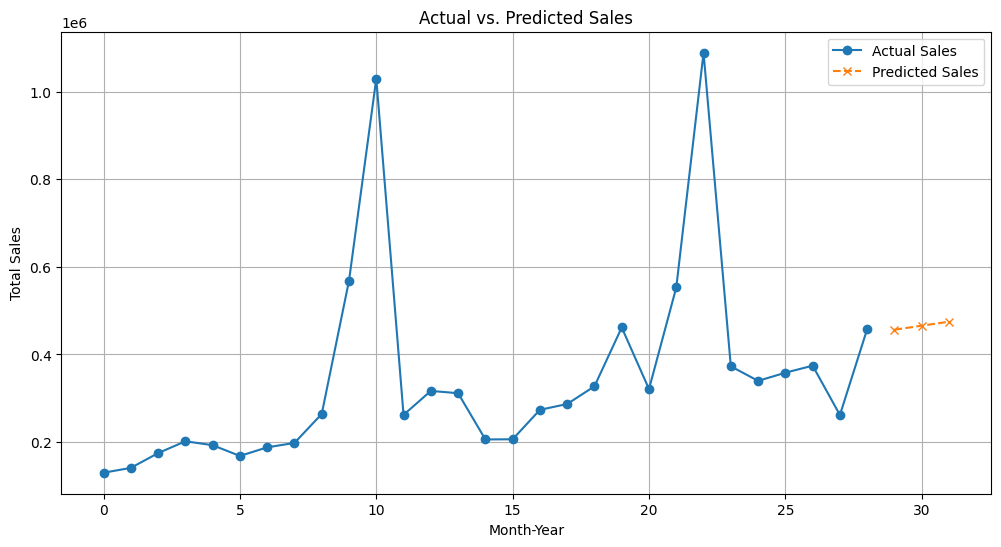

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month_Year_Num'], monthly_sales['SALES'], label='Actual Sales', marker='o')
plt.plot(future_months, future_sales, label='Predicted Sales', marker='x', linestyle='--')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-27-a0a579ed98bf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales['Month'], y=monthly_sales['SALES'], palette='viridis')


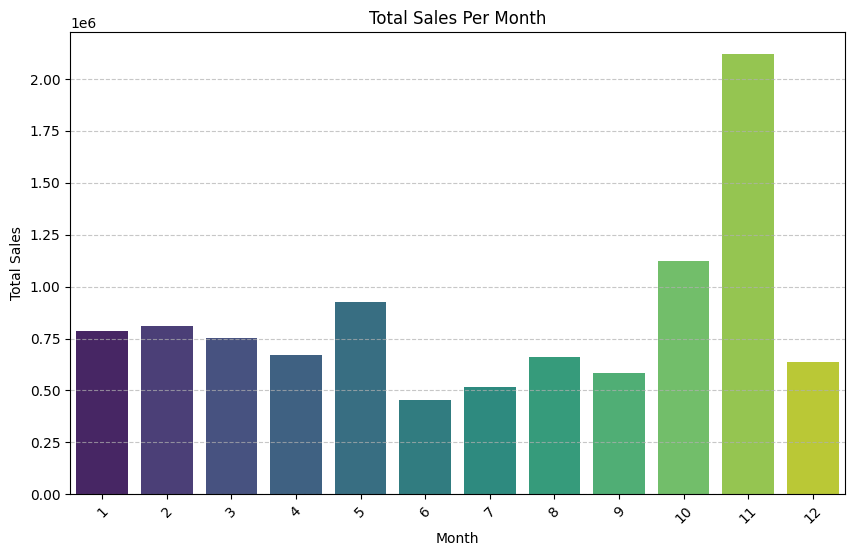

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
monthly_sales = df.groupby(['Month'])['SALES'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales['Month'], y=monthly_sales['SALES'], palette='viridis')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales Per Month')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
